# Fremont Bridge Bicycle Counts

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
import seaborn as sns

In [ ]:
df=pd.read_csv("F:/Study Material/Project_Data/fremont-bridge.csv", index_col= 'Date', parse_dates=True)

In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45984 entries, 2012-10-03 00:00:00 to 2017-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   West    45976 non-null  float64
 1   East    45976 non-null  float64
dtypes: float64(2)
memory usage: 1.1 MB


In [ ]:
df.head()

,West,East
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


# Pre-Processing

In [ ]:
df_nw=df.copy()

In [ ]:
df_nw['Total']=df['East']+df['West']

<AxesSubplot:xlabel='Date'>

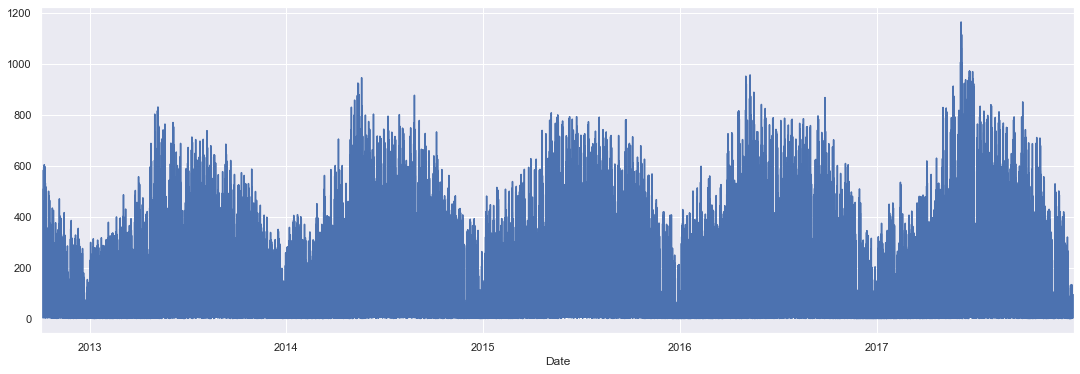

In [ ]:
df_nw['Total'].plot(figsize=(18.5,6))

In [ ]:
df_nw.describe()

,West,East,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


In [ ]:
df_nw.drop(["West","East"],axis=1,inplace=True)

In [ ]:
df_nw.columns

Index(['Total'], dtype='object')

In [ ]:
df_nw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45984 entries, 2012-10-03 00:00:00 to 2017-12-31 23:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   45976 non-null  float64
dtypes: float64(1)
memory usage: 718.5 KB


In [ ]:
df_nw.shape

(45984, 1)

In [ ]:
df_new = df_nw.asfreq('H')

In [ ]:
df_new.shape,df_nw.shape

((45984, 1), (45984, 1))

In [ ]:
df_new.isnull().sum()

Total    8
dtype: int64

In [ ]:
df_new.fillna(method='ffill', inplace=True)

In [ ]:
df_new.isnull().sum()

Total    0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45984 entries, 2012-10-03 00:00:00 to 2017-12-31 23:00:00
Freq: H
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Total   45984 non-null  float64
dtypes: float64(1)
memory usage: 718.5 KB


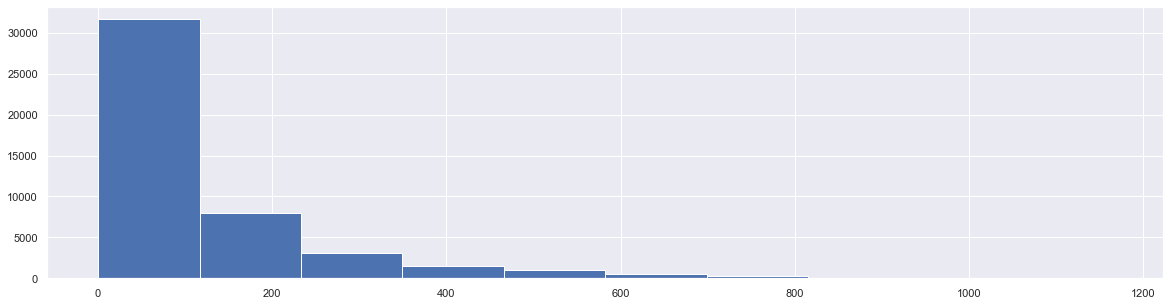

In [ ]:
fig = df_new.Total.hist(figsize = (20,5))

# Visualizing Existing Data and observing patterns

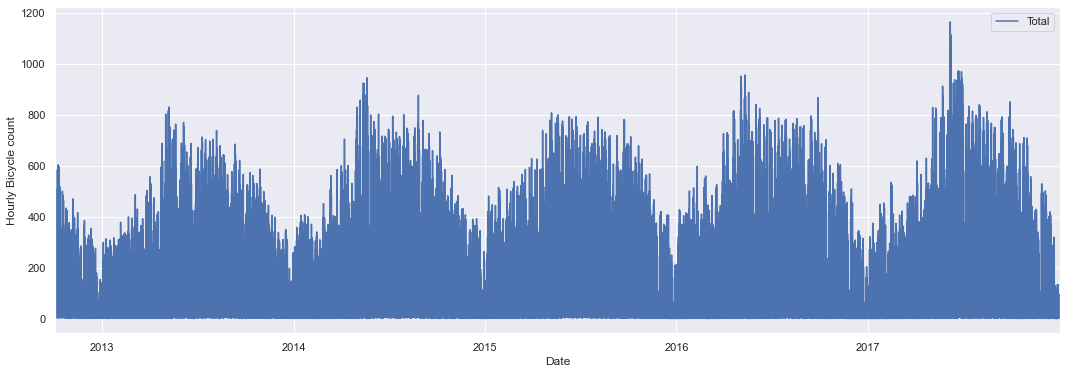

In [ ]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()
df_new.plot(figsize=(18,6))
plt.ylabel("Hourly Bicycle count")
plt.show()

<AxesSubplot:xlabel='Date'>

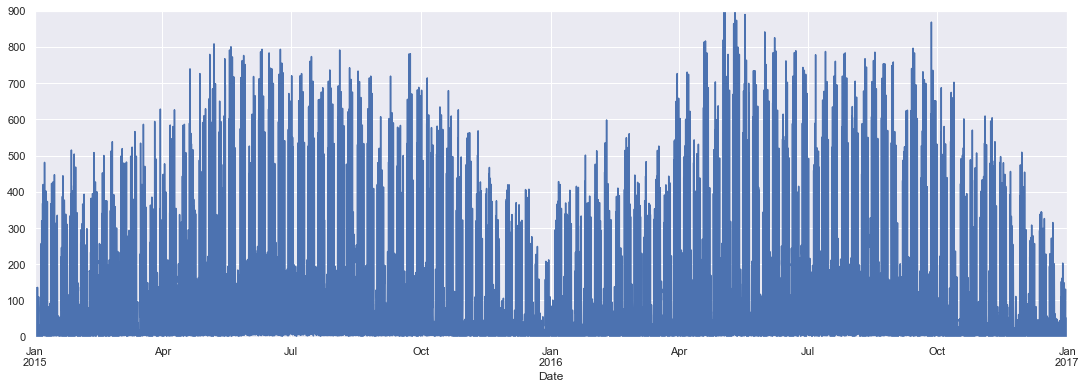

In [ ]:
df_new['Total'].plot(xlim=['2015-01-01','2017-01-01'],ylim=[0,900],figsize=(18.5,6))

<AxesSubplot:xlabel='Date'>

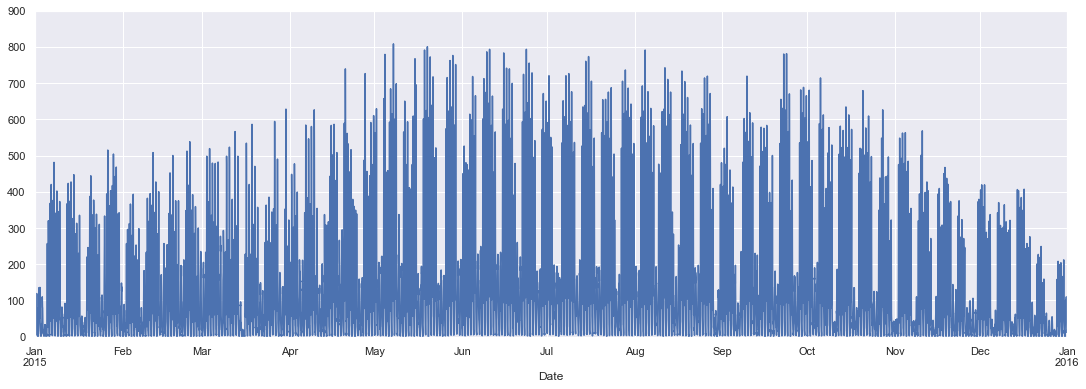

In [ ]:
#1 yr data
df_new['Total'].plot(xlim=['2015-01-01','2016-01-01'],ylim=[0,900],figsize=(18.5,6))

<AxesSubplot:xlabel='Date'>

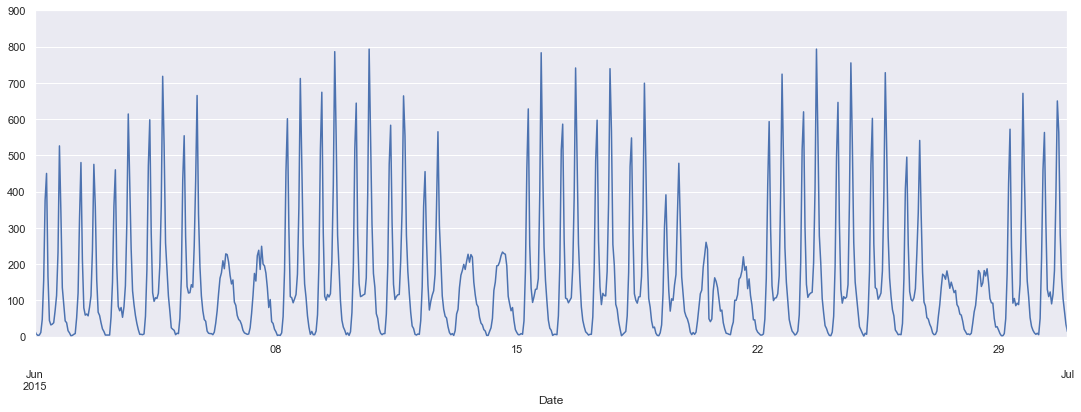

In [ ]:
#1 month data
df_new['Total'].plot(xlim=['2015-06-01','2015-07-01'],ylim=[0,900],figsize=(18.5,6))

<AxesSubplot:xlabel='Date'>

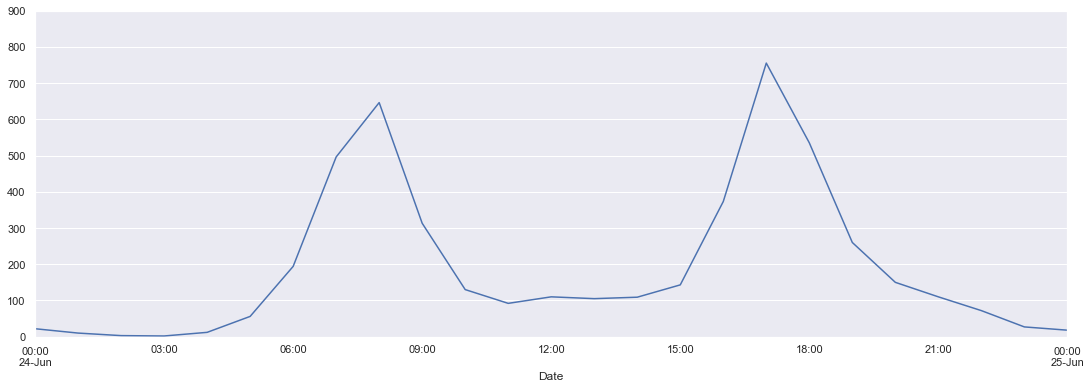

In [ ]:
#1 Day data
df_new['Total'].plot(xlim=['2015-06-24','2015-06-25'],ylim=[0,900],figsize=(18.5,6))

# Time Series Components

In [ ]:
x = df_new["Total"].resample('M').mean()

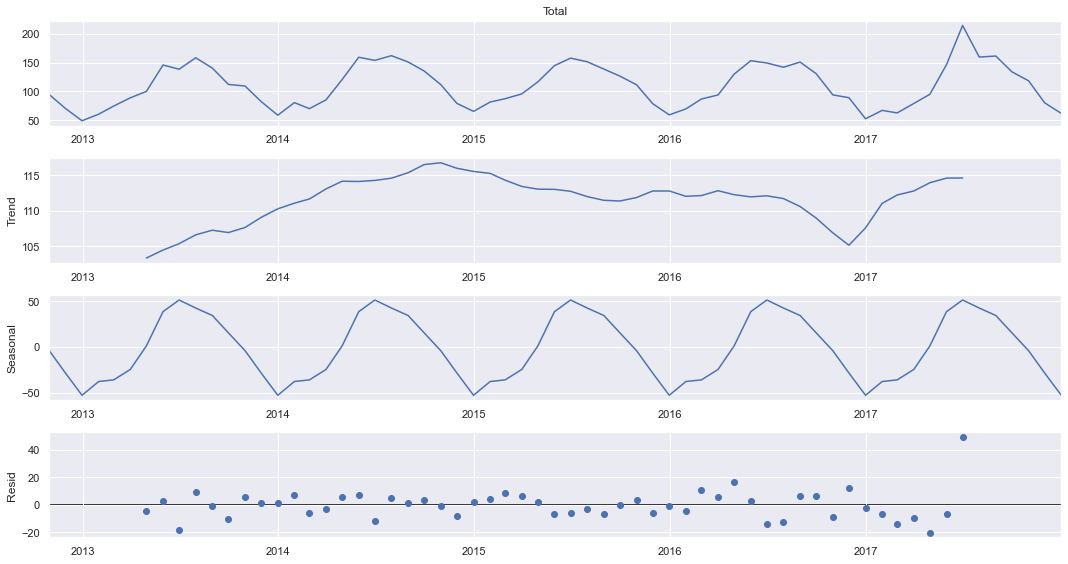

In [ ]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 15, 8
decomposition = sm.tsa.seasonal_decompose(x, model='additive')
fig = decomposition.plot()
plt.show()

# Time Resampling

In [ ]:
df_new.head()

,Total
Date,
2012-10-03 00:00:00,13.0
2012-10-03 01:00:00,10.0
2012-10-03 02:00:00,2.0
2012-10-03 03:00:00,5.0
2012-10-03 04:00:00,7.0


In [ ]:
df_new.resample(rule='D').min()

,Total
Date,
2012-10-03,2.0
2012-10-04,3.0
2012-10-05,4.0
2012-10-06,3.0
2012-10-07,3.0
...,...
2017-12-27,0.0
2017-12-28,0.0
2017-12-29,2.0


<AxesSubplot:xlabel='Date'>

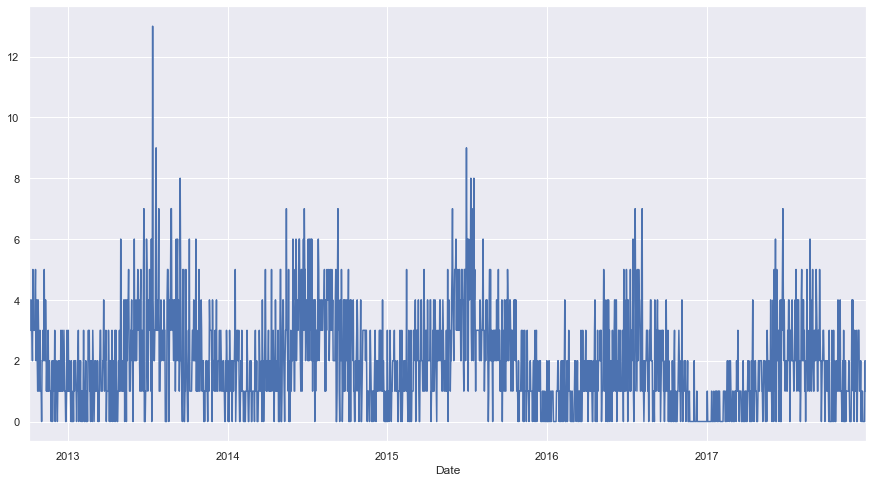

In [ ]:
df_new.resample(rule='D').min()['Total'].plot()

In [ ]:
df_new.resample(rule='A').min()

,Total
Date,
2012-12-31,0.0
2013-12-31,0.0
2014-12-31,0.0
2015-12-31,0.0
2016-12-31,0.0
2017-12-31,0.0


In [ ]:
df_new.resample(rule='A').max()

,Total
Date,
2012-12-31,604.0
2013-12-31,831.0
2014-12-31,946.0
2015-12-31,808.0
2016-12-31,957.0
2017-12-31,1165.0


<AxesSubplot:xlabel='Date'>

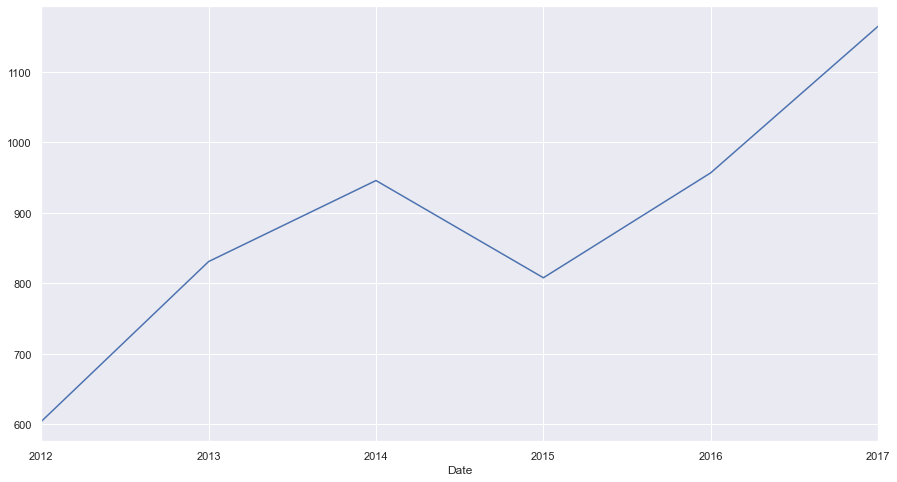

In [ ]:
##year end frequency
df_new.resample(rule='A').max()['Total'].plot()

<AxesSubplot:xlabel='Date'>

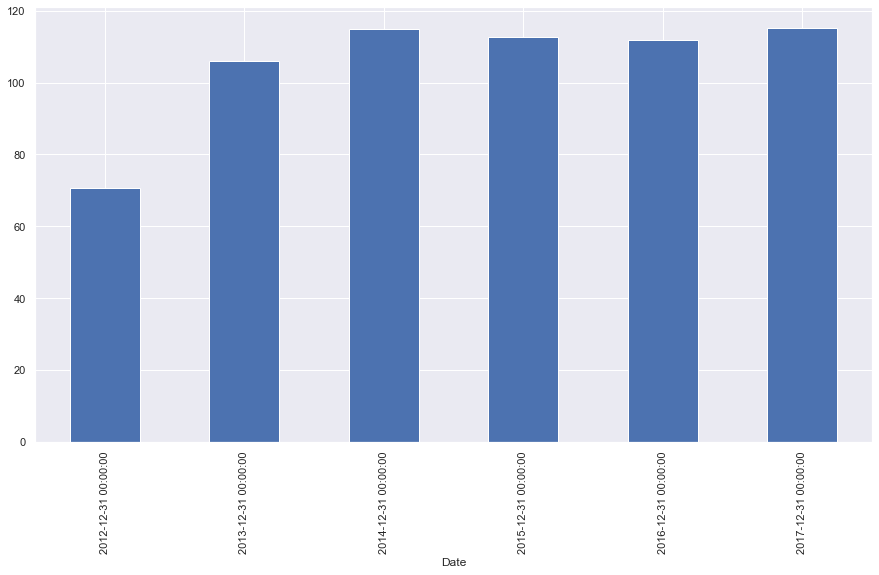

In [ ]:
##plotting
df_new['Total'].resample(rule='A').mean().plot(kind='bar')

In [ ]:
df_new.resample(rule='QS').max()['Total']

Date
2012-10-01     604.0
2013-01-01     503.0
2013-04-01     831.0
2013-07-01     738.0
2013-10-01     587.0
2014-01-01     585.0
2014-04-01     946.0
2014-07-01     877.0
2014-10-01     733.0
2015-01-01     628.0
2015-04-01     808.0
2015-07-01     791.0
2015-10-01     714.0
2016-01-01     726.0
2016-04-01     957.0
2016-07-01     868.0
2016-10-01     702.0
2017-01-01     535.0
2017-04-01    1165.0
2017-07-01     851.0
2017-10-01     742.0
Freq: QS-JAN, Name: Total, dtype: float64

<AxesSubplot:xlabel='Date'>

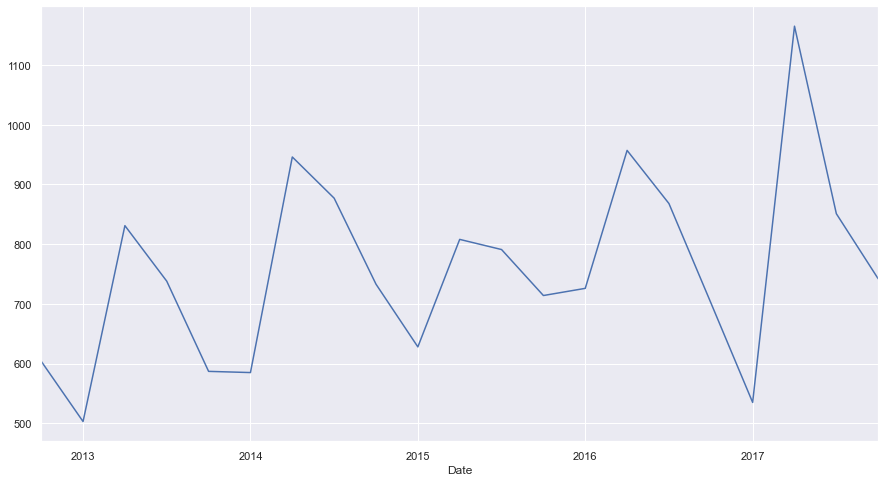

In [ ]:
#quartely start frequency
df_new.resample(rule='QS').max()['Total'].plot()

<AxesSubplot:xlabel='Date'>

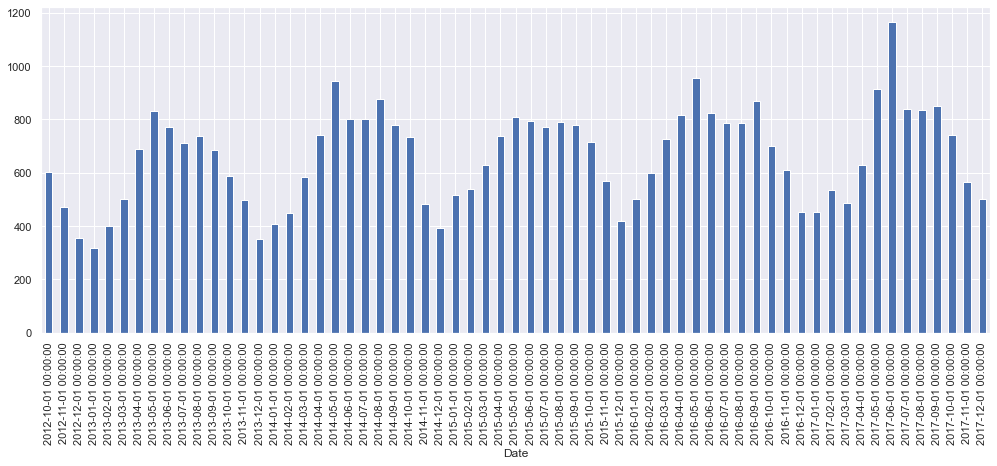

In [ ]:
df_new.resample(rule='MS').max()['Total'].plot(kind='bar',figsize=(17,6)) ##MS- Month Start

In [ ]:
df_new.head(31)

,Total
Date,
2012-10-03 00:00:00,13.0
2012-10-03 01:00:00,10.0
2012-10-03 02:00:00,2.0
2012-10-03 03:00:00,5.0
2012-10-03 04:00:00,7.0
2012-10-03 05:00:00,31.0
2012-10-03 06:00:00,155.0
2012-10-03 07:00:00,352.0
2012-10-03 08:00:00,437.0


<AxesSubplot:xlabel='Date'>

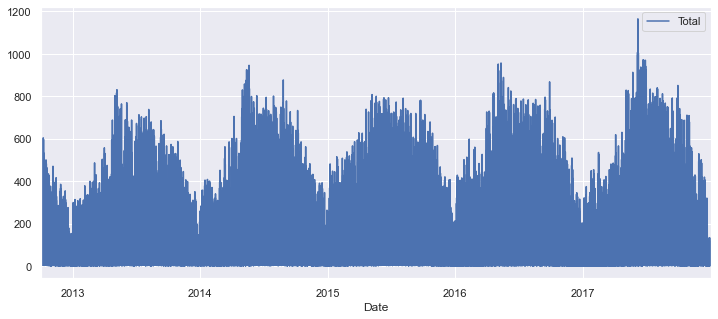

In [ ]:
df_new[['Total']].plot(figsize=(12,5))

### We can gain more insight by resampling the data to a coarser grid. Let’s resample by week:

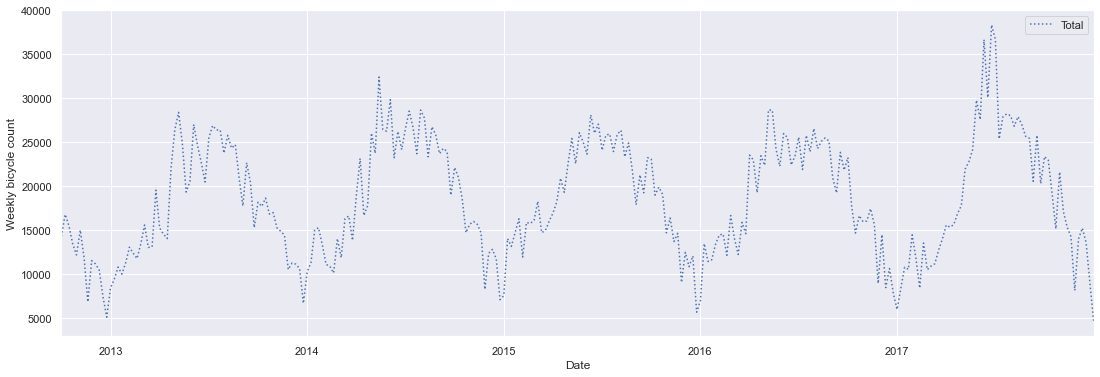

In [ ]:
weekly = df_new.resample("W").sum()
weekly.plot(style=[':', '--', '-'],figsize=(18.5,6))
plt.ylabel('Weekly bicycle count')
plt.show()

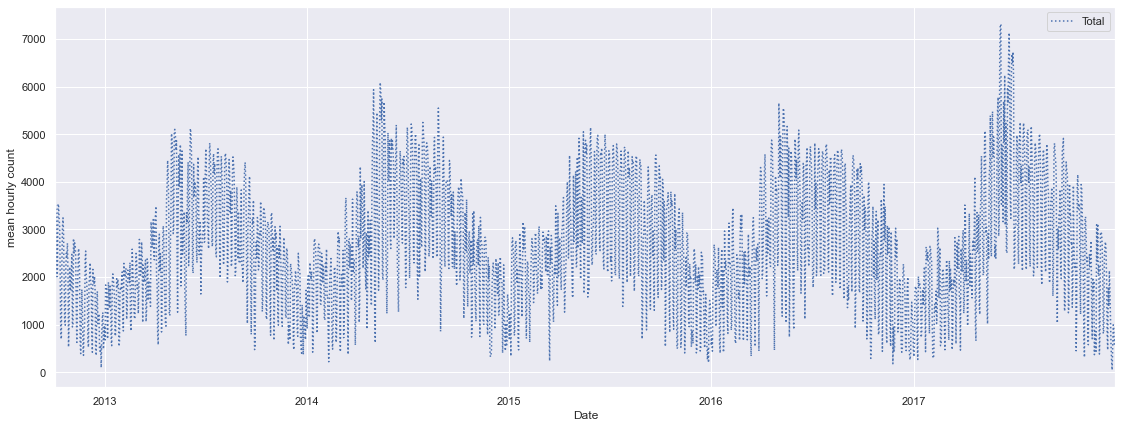

In [ ]:
daily = df_new.resample('D').sum()
daily.plot(style=[':', '--', '-'],figsize=(19,7))
plt.ylabel('mean hourly count')
plt.show()

# Testing For Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and Data is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adf_test(df_new['Total'])

ADF Statistics: -21.652149045445928
p- value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and Data is stationary


In [ ]:
df_new

,Total
Date,
2012-10-03 00:00:00,13.0
2012-10-03 01:00:00,10.0
2012-10-03 02:00:00,2.0
2012-10-03 03:00:00,5.0
2012-10-03 04:00:00,7.0
...,...
2017-12-31 19:00:00,21.0
2017-12-31 20:00:00,14.0
2017-12-31 21:00:00,13.0


# Feature Creation

In [ ]:
## Use Techniques Differencing
df_new['Cyclists_first_Difference']=df_new['Total']-df_new['Total'].shift(1)

In [ ]:
## Use Techniques Differencing
df_new['Cyclists_second_Difference']=df_new['Cyclists_first_Difference']-df_new['Cyclists_first_Difference'].shift(1)

In [ ]:
### 12 months 
## Use Techniques Differencing
df_new['Cyclists_12_Difference']=df_new['Total']-df_new['Total'].shift(12)

In [ ]:
df_new

,Total,Cyclists_first_Difference,Cyclists_second_Difference,Cyclists_12_Difference
Date,,,,
2012-10-03 00:00:00,13.0,NaN,NaN,NaN
2012-10-03 01:00:00,10.0,-3.0,NaN,NaN
2012-10-03 02:00:00,2.0,-8.0,-5.0,NaN
2012-10-03 03:00:00,5.0,3.0,11.0,NaN
2012-10-03 04:00:00,7.0,2.0,-1.0,NaN
...,...,...,...,...
2017-12-31 19:00:00,21.0,1.0,14.0,11.0
2017-12-31 20:00:00,14.0,-7.0,-8.0,-8.0
2017-12-31 21:00:00,13.0,-1.0,6.0,-17.0


# Train-Test Split

In [ ]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2016,12,31)
test_dataset_end=datetime(2017,12,31)

In [ ]:
train_data=df_new[:train_dataset_end]
test_data=df_new[train_dataset_end+timedelta(days=1):test_dataset_end]

In [ ]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2017-01-01 00:00:00
2017-12-31 00:00:00


In [ ]:
train_data

,Total,Cyclists_first_Difference,Cyclists_second_Difference,Cyclists_12_Difference
Date,,,,
2012-10-03 00:00:00,13.0,NaN,NaN,NaN
2012-10-03 01:00:00,10.0,-3.0,NaN,NaN
2012-10-03 02:00:00,2.0,-8.0,-5.0,NaN
2012-10-03 03:00:00,5.0,3.0,11.0,NaN
2012-10-03 04:00:00,7.0,2.0,-1.0,NaN
...,...,...,...,...
2016-12-30 20:00:00,16.0,-8.0,26.0,-91.0
2016-12-30 21:00:00,8.0,-8.0,0.0,-67.0
2016-12-30 22:00:00,13.0,5.0,13.0,-54.0


In [ ]:
train_data_daily=train_data.resample('D').mean()

In [ ]:
train_data_daily

,Total,Cyclists_first_Difference,Cyclists_second_Difference,Cyclists_12_Difference
Date,,,,
2012-10-03,146.708333,0.173913,-1.318182,52.083333
2012-10-04,144.791667,1.000000,1.125000,-0.541667
2012-10-05,131.166667,-0.375000,0.041667,-8.541667
2012-10-06,83.583333,0.083333,0.166667,-17.458333
2012-10-07,89.250000,-0.750000,-0.083333,7.041667
...,...,...,...,...
2016-12-27,46.041667,0.333333,0.208333,17.541667
2016-12-28,61.333333,-0.125000,-0.708333,9.916667
2016-12-29,47.250000,-0.166667,0.250000,-12.083333


In [ ]:
test_data_daily=test_data.resample('D').mean()

In [ ]:
test_data_daily

,Total,Cyclists_first_Difference,Cyclists_second_Difference,Cyclists_12_Difference
Date,,,,
2017-01-01,13.583333,-0.125000,0.250000,-1.083333
2017-01-02,25.958333,0.000000,0.083333,8.041667
2017-01-03,72.333333,-0.083333,-0.250000,20.916667
2017-01-04,75.333333,0.208333,0.041667,2.583333
2017-01-05,74.041667,0.000000,0.041667,-0.791667
...,...,...,...,...
2017-12-27,41.541667,0.000000,-0.250000,10.708333
2017-12-28,40.500000,-0.166667,-0.333333,-2.958333
2017-12-29,24.625000,0.041667,0.375000,-9.458333


# ACF & PACF

Final Thoughts on Autocorrelation and Partial Autocorrelation

Identification of an AR model is often best done with the PACF. For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor. Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

C:\Users\Ajay\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


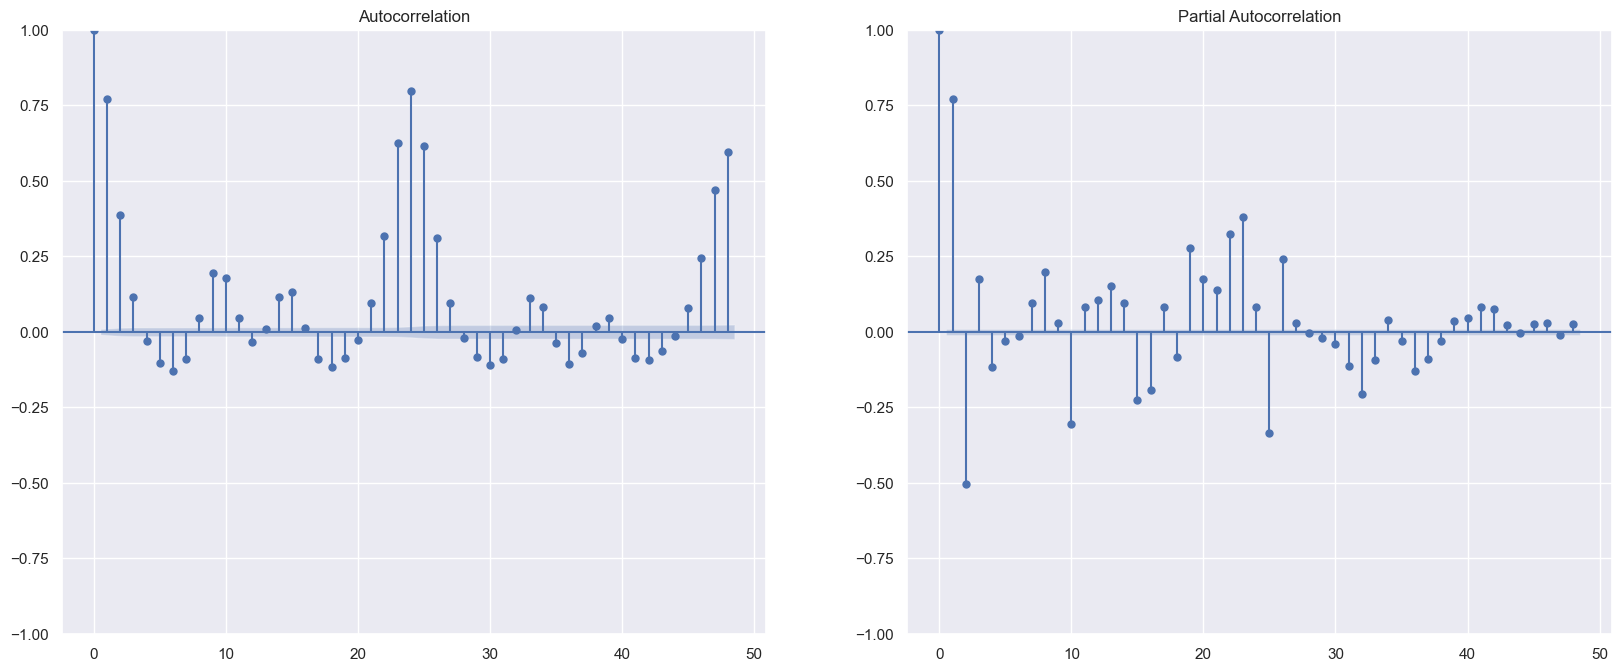

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig, axes = plt.subplots(1,2,figsize=(20,8), dpi= 100)
acf12 = plot_acf(df_new["Total"].dropna(),lags=48,ax=axes[0])
pacf12 = plot_pacf(df_new["Total"].dropna(),lags=48,ax=axes[1])

# ARIMA MODEL 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
import pandas as pd
%matplotlib inline

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) 
for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [ ]:
y_daily=df_new['Total'].resample('D').mean() 

### This daily resampled data is used for further model fitting

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_daily,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('Order{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
              continue

Order(0, 0, 0)x(0, 0, 0, 12)12 - AIC:23876.936638111212
Order(0, 0, 0)x(0, 0, 1, 12)12 - AIC:22383.541150928708
Order(0, 0, 0)x(0, 1, 0, 12)12 - AIC:21329.380689179452
Order(0, 0, 0)x(0, 1, 1, 12)12 - AIC:20354.084934926264
Order(0, 0, 0)x(1, 0, 0, 12)12 - AIC:21198.128277332173
Order(0, 0, 0)x(1, 0, 1, 12)12 - AIC:20477.825867067408
Order(0, 0, 0)x(1, 1, 0, 12)12 - AIC:20878.64815376999
Order(0, 0, 0)x(1, 1, 1, 12)12 - AIC:20344.006209203675
Order(0, 0, 1)x(0, 0, 0, 12)12 - AIC:21896.657505281582
Order(0, 0, 1)x(0, 0, 1, 12)12 - AIC:20995.63438727699
Order(0, 0, 1)x(0, 1, 0, 12)12 - AIC:20567.361653367792
Order(0, 0, 1)x(0, 1, 1, 12)12 - AIC:19480.59862822675
Order(0, 0, 1)x(1, 0, 0, 12)12 - AIC:20340.59371239061
Order(0, 0, 1)x(1, 0, 1, 12)12 - AIC:19600.82396175836
Order(0, 0, 1)x(1, 1, 0, 12)12 - AIC:20028.970719495257
Order(0, 0, 1)x(1, 1, 1, 12)12 - AIC:19480.708073855032
Order(0, 1, 0)x(0, 0, 0, 12)12 - AIC:19901.46950401325
Order(0, 1, 0)x(0, 0, 1, 12)12 - AIC:19555.4627019229


C:\Users\Ajay\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Order(0, 1, 1)x(1, 1, 1, 12)12 - AIC:19575.018920763578
Order(1, 0, 0)x(0, 0, 0, 12)12 - AIC:19850.892277500367
Order(1, 0, 0)x(0, 0, 1, 12)12 - AIC:19544.853400733104
Order(1, 0, 0)x(0, 1, 0, 12)12 - AIC:20937.968679467227
Order(1, 0, 0)x(0, 1, 1, 12)12 - AIC:19408.900891891302
Order(1, 0, 0)x(1, 0, 0, 12)12 - AIC:19609.832073996484
Order(1, 0, 0)x(1, 0, 1, 12)12 - AIC:19541.67240154216
Order(1, 0, 0)x(1, 1, 0, 12)12 - AIC:20279.037917887934
Order(1, 0, 0)x(1, 1, 1, 12)12 - AIC:19348.695765500885
Order(1, 0, 1)x(0, 0, 0, 12)12 - AIC:19829.922709309147
Order(1, 0, 1)x(0, 0, 1, 12)12 - AIC:19531.336345382064
Order(1, 0, 1)x(0, 1, 0, 12)12 - AIC:20566.82439773166
Order(1, 0, 1)x(0, 1, 1, 12)12 - AIC:19285.276145157084
Order(1, 0, 1)x(1, 0, 0, 12)12 - AIC:19609.178504482545
Order(1, 0, 1)x(1, 0, 1, 12)12 - AIC:19527.143241888796
Order(1, 0, 1)x(1, 1, 0, 12)12 - AIC:19971.558238761543
Order(1, 0, 1)x(1, 1, 1, 12)12 - AIC:19274.889078973152
Order(1, 1, 0)x(0, 0, 0, 12)12 - AIC:19902.6476409

In [ ]:
#Order(1, 1, 1)x(1, 0, 1, 12)12 - AIC:19109.169250107912
model_ARIMA_daily=ARIMA(y_daily,order=(1,0,1))

In [ ]:
model_Arima_fit_daily=model_ARIMA_daily.fit()

In [ ]:
model_Arima_fit_daily.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Total   No. Observations:                 1916
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -9737.207
Date:                Mon, 26 Sep 2022   AIC                          19482.413
Time:                        22:20:16   BIC                          19504.645
Sample:                    10-03-2012   HQIC                         19490.594
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        110.1887      2.509     43.922      0.000     105.272     115.106
ar.L1          0.4977      0.026     19.285      0.000       0.447       0.548
ma.L1          0.3782      0.025     15.199      0.000       0.329       0.427
sigma2      1521.1129     48.819     31.159      0.000    1425.430    1616.795
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                19.51
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### kernel density estimation (KDE):non-parametric method to estimate the probability density function of a random variable based on kernels as weights.

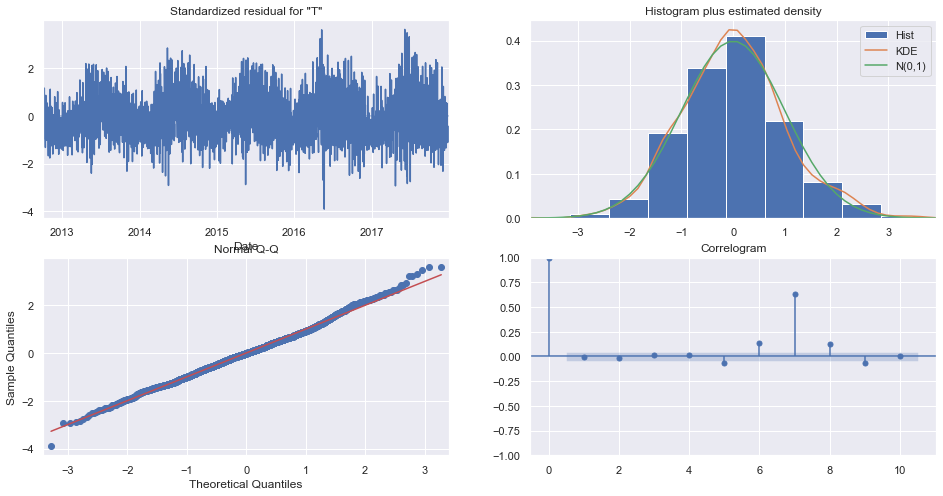

In [ ]:
model_Arima_fit_daily.plot_diagnostics(figsize=(16,8)) 
plt.show()

In [ ]:
test_data_daily

,Total,Cyclists_first_Difference,Cyclists_second_Difference,Cyclists_12_Difference
Date,,,,
2017-01-01,13.583333,-0.125000,0.250000,-1.083333
2017-01-02,25.958333,0.000000,0.083333,8.041667
2017-01-03,72.333333,-0.083333,-0.250000,20.916667
2017-01-04,75.333333,0.208333,0.041667,2.583333
2017-01-05,74.041667,0.000000,0.041667,-0.791667
...,...,...,...,...
2017-12-27,41.541667,0.000000,-0.250000,10.708333
2017-12-28,40.500000,-0.166667,-0.333333,-2.958333
2017-12-29,24.625000,0.041667,0.375000,-9.458333


In [ ]:
pred_Arima_daily=model_Arima_fit_daily.predict(start=pred_start_date,end=pred_end_date)#datetime(2017,01,01),end=datetime(2017,12,31))
residuals_daily=test_data_daily['Total']-pred_Arima_daily

In [ ]:
pred_Arima_daily

Date
2017-01-01    46.075099
2017-01-02    49.822297
2017-01-03    59.244012
2017-01-04    96.299199
2017-01-05    84.912875
                ...    
2017-12-27    60.426592
2017-12-28    68.882513
2017-12-29    64.772199
2017-12-30    52.422272
2017-12-31    61.983165
Freq: D, Name: predicted_mean, Length: 365, dtype: float64

In [ ]:
test_data_daily['Total']

Date
2017-01-01    13.583333
2017-01-02    25.958333
2017-01-03    72.333333
2017-01-04    75.333333
2017-01-05    74.041667
                ...    
2017-12-27    41.541667
2017-12-28    40.500000
2017-12-29    24.625000
2017-12-30    30.208333
2017-12-31    12.000000
Freq: D, Name: Total, Length: 365, dtype: float64

<AxesSubplot:xlabel='Date'>

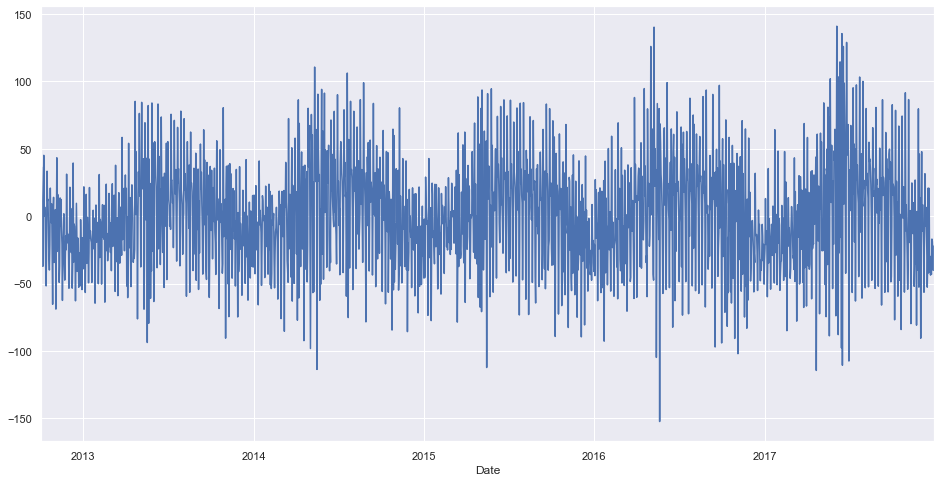

In [ ]:
model_Arima_fit_daily.resid.plot(figsize=(16,8))

<AxesSubplot:ylabel='Density'>

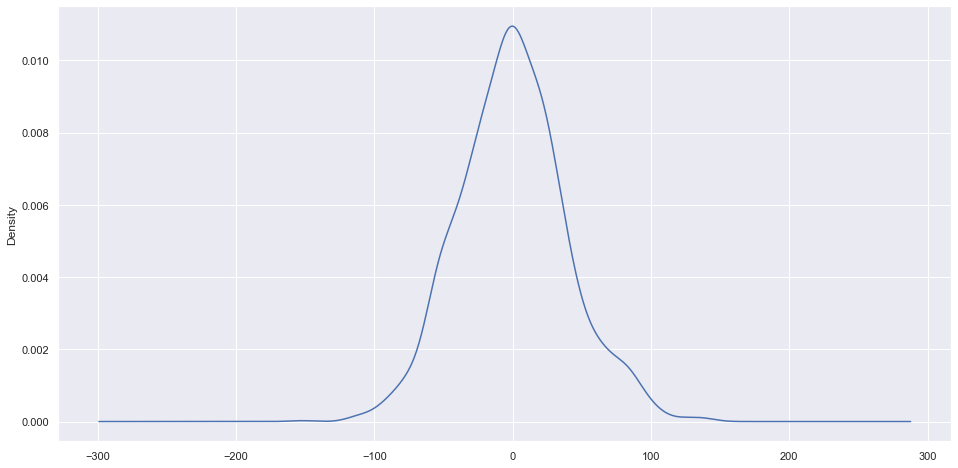

In [ ]:
model_Arima_fit_daily.resid.plot(kind='kde',figsize=(16,8))# kernel density estimation (KDE):non-parametric method to estimate the probability density function of a random variable based on kernels as weights.

In [ ]:
test_data_daily['Predicted_ARIMA_daily']=pred_Arima_daily

In [ ]:
test_data_daily

,Total,Cyclists_first_Difference,Cyclists_second_Difference,Cyclists_12_Difference,Predicted_ARIMA_daily
Date,,,,,
2017-01-01,13.583333,-0.125000,0.250000,-1.083333,46.075099
2017-01-02,25.958333,0.000000,0.083333,8.041667,49.822297
2017-01-03,72.333333,-0.083333,-0.250000,20.916667,59.244012
2017-01-04,75.333333,0.208333,0.041667,2.583333,96.299199
2017-01-05,74.041667,0.000000,0.041667,-0.791667,84.912875
...,...,...,...,...,...
2017-12-27,41.541667,0.000000,-0.250000,10.708333,60.426592
2017-12-28,40.500000,-0.166667,-0.333333,-2.958333,68.882513
2017-12-29,24.625000,0.041667,0.375000,-9.458333,64.772199


<AxesSubplot:xlabel='Date'>

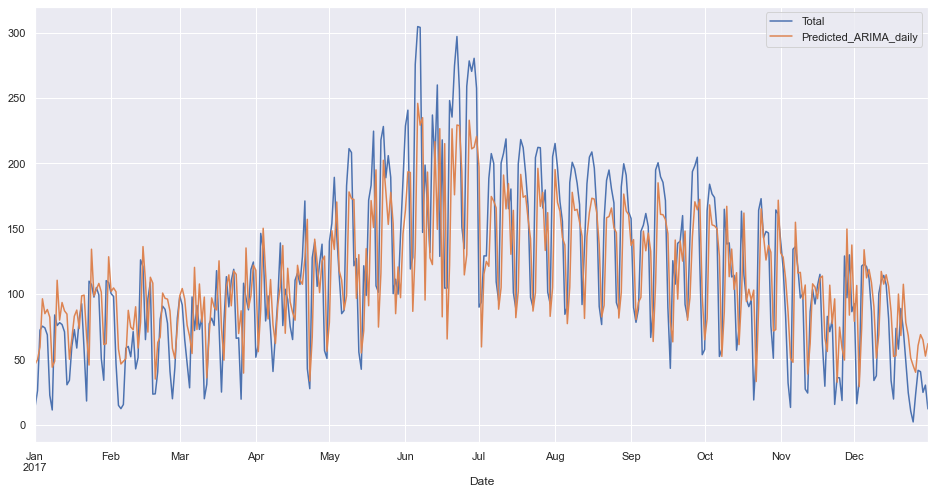

In [ ]:
test_data_daily[['Total','Predicted_ARIMA_daily']].plot(figsize=(16,8))

# SARIMA MODEL 

In [ ]:
#Order(1, 1, 1)x(1, 0, 1, 12)12 - AIC:19109.169250107912
mod_sarima_daily = sm.tsa.statespace.SARIMAX(y_daily,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
model_SARIMA_fit_daily = mod_sarima_daily.fit()
model_SARIMA_fit_daily.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Total   No. Observations:                 1916
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -9632.445
Date:                            Mon, 26 Sep 2022   AIC                          19274.889
Time:                                    22:45:09   BIC                          19302.611
Sample:                                10-03-2012   HQIC                         19285.097
                                     - 12-31-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5883      0.024     24.110      0.000       0.540       0.636
ma.L1          0.2985      0.027     11.238      0.000       0.246       0.351
ar.S.L12      -0.1149      0.021     -5.438      0.000      -0.156      -0.073
ma.S.L12      -1.0000      9.583     -0.104      0.917     -19.782      17.782
sigma2      1518.5806   1.46e+04      0.104      0.917    -2.7e+04    3.01e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                56.92
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               1.56   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### kernel density estimation (KDE):non-parametric method to estimate the probability density function of a random variable based on kernels as weights.

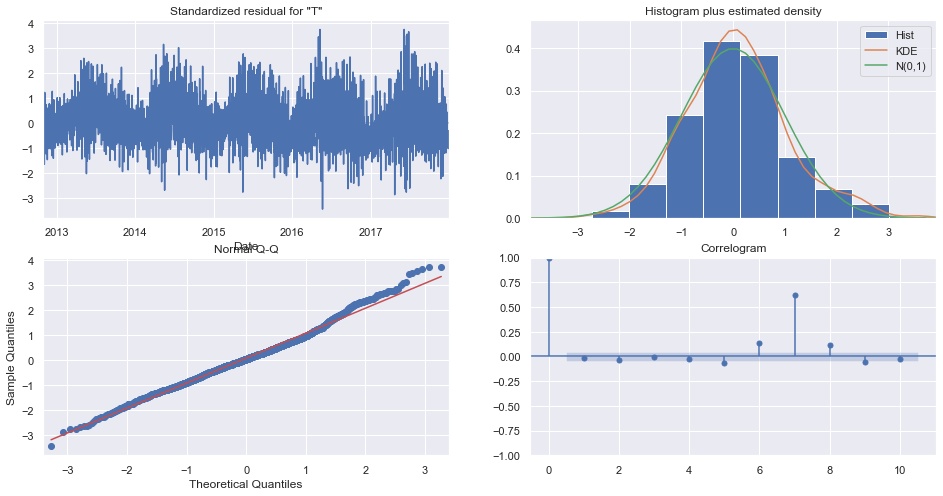

In [ ]:
model_SARIMA_fit_daily.plot_diagnostics(figsize=(16,8))
plt.show()

In [ ]:
pred_Sarima_daily=model_SARIMA_fit_daily.predict(start=pred_start_date,end=pred_end_date)#start=datetime(1956,6,6),end=datetime(1960,12,1))
residuals_daily=test_data_daily['Total']-pred_Sarima_daily

<AxesSubplot:xlabel='Date'>

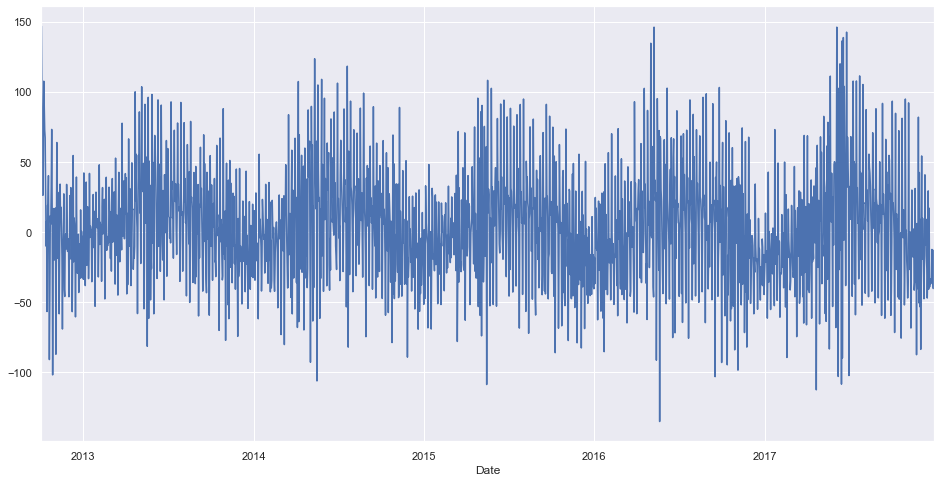

In [ ]:
model_SARIMA_fit_daily.resid.plot(figsize=(16,8))

<AxesSubplot:ylabel='Density'>

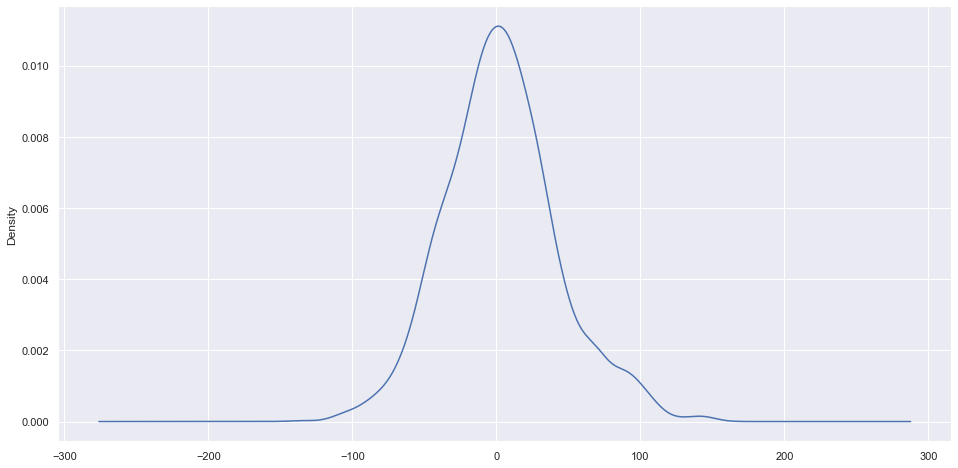

In [ ]:
model_SARIMA_fit_daily.resid.plot(kind='kde',figsize=(16,8)) # kernel density estimation (KDE):non-parametric method to estimate the probability density function of a random variable based on kernels as weights.

In [ ]:
test_data_daily['Predicted_SARIMA_daily']=pred_Sarima_daily

In [ ]:
test_data_daily

,Total,Cyclists_first_Difference,Cyclists_second_Difference,Cyclists_12_Difference,Predicted_ARIMA_daily,Predicted_SARIMA_daily
Date,,,,,,
2017-01-01,13.583333,-0.125000,0.250000,-1.083333,46.075099,44.526473
2017-01-02,25.958333,0.000000,0.083333,8.041667,49.822297,46.317434
2017-01-03,72.333333,-0.083333,-0.250000,20.916667,59.244012,58.893575
2017-01-04,75.333333,0.208333,0.041667,2.583333,96.299199,96.659730
2017-01-05,74.041667,0.000000,0.041667,-0.791667,84.912875,87.340646
...,...,...,...,...,...,...
2017-12-27,41.541667,0.000000,-0.250000,10.708333,60.426592,59.007786
2017-12-28,40.500000,-0.166667,-0.333333,-2.958333,68.882513,72.921902
2017-12-29,24.625000,0.041667,0.375000,-9.458333,64.772199,64.934242


In [ ]:
print(test_data_daily['Total'],test_data_daily['Predicted_SARIMA_daily'])

Date
2017-01-01    13.583333
2017-01-02    25.958333
2017-01-03    72.333333
2017-01-04    75.333333
2017-01-05    74.041667
                ...    
2017-12-27    41.541667
2017-12-28    40.500000
2017-12-29    24.625000
2017-12-30    30.208333
2017-12-31    12.000000
Freq: D, Name: Total, Length: 365, dtype: float64 Date
2017-01-01    44.526473
2017-01-02    46.317434
2017-01-03    58.893575
2017-01-04    96.659730
2017-01-05    87.340646
                ...    
2017-12-27    59.007786
2017-12-28    72.921902
2017-12-29    64.934242
2017-12-30    43.236260
2017-12-31    63.180983
Freq: D, Name: Predicted_SARIMA_daily, Length: 365, dtype: float64


<AxesSubplot:xlabel='Date'>

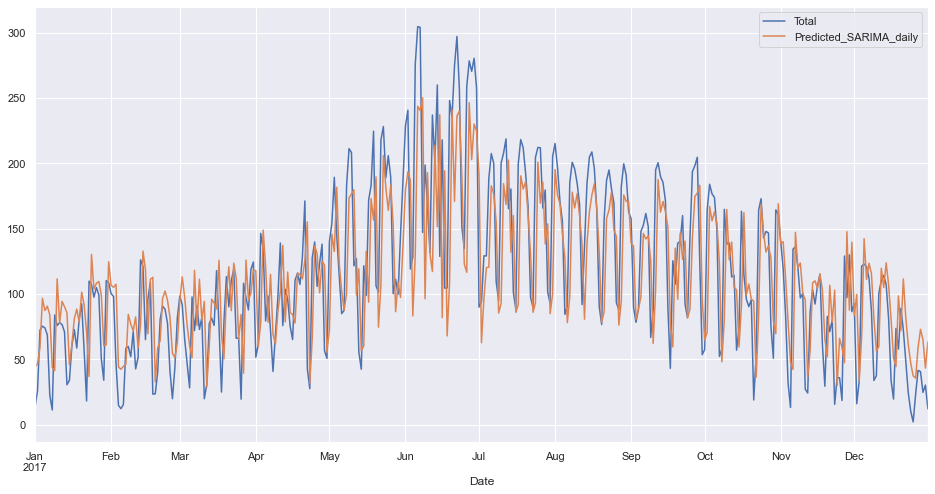

In [ ]:
test_data_daily[['Total','Predicted_SARIMA_daily']].plot(figsize=(16,8))

# Final Visualization

<AxesSubplot:xlabel='Date'>

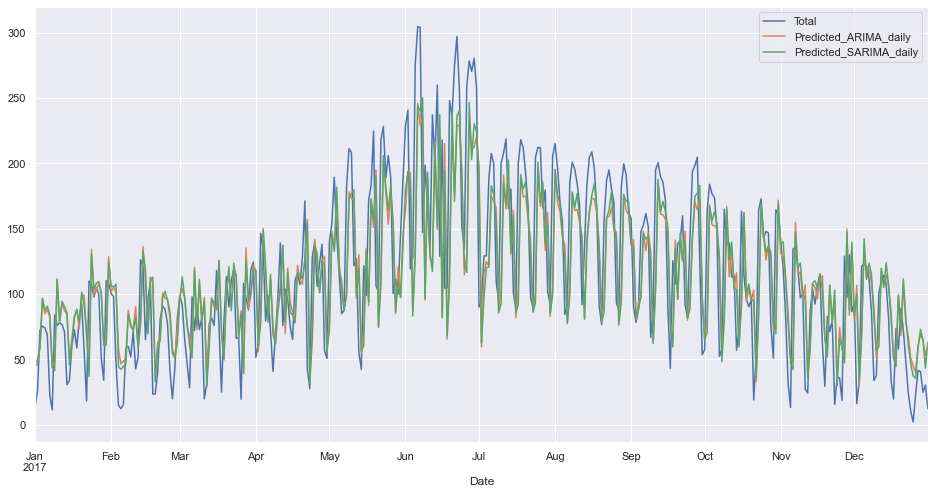

In [ ]:
test_data_daily[['Total','Predicted_ARIMA_daily','Predicted_SARIMA_daily']].plot(figsize=(16,8))

# Evaluation Metrics of the model

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
def eval(y_true,y_predicted):
    mae = mean_absolute_error(y_true, y_predicted)
    mse = mean_squared_error(y_true, y_predicted)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_true, y_predicted)
    return mae,rmse,mape

## Evaluation Metrics for ARIMA Model

In [ ]:
y_true=test_data_daily['Total']
y_pred=test_data_daily['Predicted_ARIMA_daily']
mae,rmse,mape=eval(y_true,y_pred)
print("MAE = {} ; RMSE = {} ; MAPE = {}".format(mae,rmse,mape))

MAE = 34.740518010044056 ; RMSE = 44.67594317465201 ; MAPE = 0.564174383216273


## Evaluation Metrics for SARIMA Model

In [ ]:
y_true=test_data_daily['Total']
y_pred=test_data_daily['Predicted_SARIMA_daily']
mae,rmse,mape=eval(y_true,y_pred)
print("MAE = {} ; RMSE = {} ; MAPE = {}".format(mae,rmse,mape))

MAE = 34.20165899692666 ; RMSE = 44.731011916269686 ; MAPE = 0.5352235708069286
